In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor

In [166]:
data = pd.read_csv("Billionaire/billionaires.csv")

In [167]:
data.head()

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True


## Exploratory Data Analysis

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      2614 non-null   object 
 1   rank                      2614 non-null   int64  
 2   year                      2614 non-null   int64  
 3   company.founded           2614 non-null   int64  
 4   company.name              2576 non-null   object 
 5   company.relationship      2568 non-null   object 
 6   company.sector            2591 non-null   object 
 7   company.type              2578 non-null   object 
 8   demographics.age          2614 non-null   int64  
 9   demographics.gender       2580 non-null   object 
 10  location.citizenship      2614 non-null   object 
 11  location.country code     2614 non-null   object 
 12  location.gdp              2614 non-null   float64
 13  location.region           2614 non-null   object 
 14  wealth.t

In [169]:
data.describe()

,rank,year,company.founded,demographics.age,location.gdp,wealth.worth in billions
count,2614.000000,2614.000000,2614.000000,2614.000000,2.614000e+03,2614.000000
mean,599.672533,2008.411630,1924.711936,53.341239,1.769103e+12,3.531943
std,467.885695,7.483598,243.776546,25.333320,3.547083e+12,5.088813
min,1.000000,1996.000000,0.000000,-42.000000,0.000000e+00,1.000000
25%,215.000000,2001.000000,1936.000000,47.000000,0.000000e+00,1.400000
50%,430.000000,2014.000000,1963.000000,59.000000,0.000000e+00,2.000000
75%,988.000000,2014.000000,1985.000000,70.000000,7.250000e+11,3.500000
max,1565.000000,2014.000000,2012.000000,98.000000,1.060000e+13,76.000000


In [170]:
data.columns

Index(['name', 'rank', 'year', 'company.founded', 'company.name',
       'company.relationship', 'company.sector', 'company.type',
       'demographics.age', 'demographics.gender', 'location.citizenship',
       'location.country code', 'location.gdp', 'location.region',
       'wealth.type', 'wealth.worth in billions', 'wealth.how.category',
       'wealth.how.from emerging', 'wealth.how.industry',
       'wealth.how.inherited', 'wealth.how.was founder',
       'wealth.how.was political'],
      dtype='object')

In [171]:
data["location.country code"].head()

0    USA
1    USA
2    USA
3    USA
4    USA
Name: location.country code, dtype: object

In [172]:
data["location.region"].head()

0    North America
1    North America
2    North America
3    North America
4    North America
Name: location.region, dtype: object

In [173]:
data["location.country code"].unique()

array(['USA', 'MEX', 'CHE', 'ESP', 'HKG', 'Taiwan', 'DEU', 'SAU', 'JPN',
       'SWE', 'FRA', 'CAN', 'PHL', 'IDN', 'KOR', 'MYS', 'ITA', 'SGP',
       'NGA', 'BRA', 'RUS', 'IND', 'GBR', 'AUS', 'THA', 'KWT', 'TUR',
       'CHL', 'NLD', 'VEN', 'CHN', 'ARG', 'GRC', 'COL', 'CYP', 'ZAF',
       'IRL', 'UKR', 'CZE', 'ISR', 'DEN', 'LBN', 'AUT', 'DNK', 'NZL',
       'FIN', 'BMU', 'PRT', 'ARE', 'LIE', 'GEO', 'NOR', 'BEL', 'ECU',
       'BHR', 'PER', 'AGO', 'SWZ', 'POL', 'EGY', 'DZA', 'MAR', 'GGY',
       'KAZ', 'MAC', 'MCO', 'VNM', 'ROU', 'KNA', 'OMN', 'NPL', 'UGA',
       'LTU', 'TZA'], dtype=object)

In [174]:
data["wealth.worth in billions"].head()

0    18.5
1    58.7
2    76.0
3    15.0
4    32.3
Name: wealth.worth in billions, dtype: float64

## Data Cleaning and Preprocessing

In [175]:
data.head(10)

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True
5,Carlos Slim Helu,2,2014,1990,Telmex,founder,Communications,privatization,74,male,...,0.000000e+00,Latin America,privatized and resources,72.0,Non-Traded Sectors,True,Media,not inherited,True,True
6,Oeri Hoffman and Sacher,3,1996,1896,F. Hoffmann-La Roche,NaN,pharmaceuticals,new,0,NaN,...,3.300000e+11,Europe,inherited,13.1,New Sectors,True,Technology-Medical,3rd generation,True,True
7,Paul Allen,3,2001,1975,Microsoft,founder,technology,new,48,male,...,1.060000e+13,North America,founder non-finance,30.4,New Sectors,True,Technology-Computer,not inherited,True,True
8,Amancio Ortega,3,2014,1975,Zara,founder,Fashion,new,77,male,...,0.000000e+00,Europe,founder non-finance,64.0,Non-Traded Sectors,True,"Retail, Restaurant",not inherited,True,True
9,Lee Shau Kee,4,1996,1976,Henderson Land Development,founder/chairman,real estate,new,68,male,...,1.600000e+11,East Asia,self-made finance,12.7,Financial,True,Real Estate,not inherited,True,True


In [176]:
data.isna().sum()

name                         0
rank                         0
year                         0
company.founded              0
company.name                38
company.relationship        46
company.sector              23
company.type                36
demographics.age             0
demographics.gender         34
location.citizenship         0
location.country code        0
location.gdp                 0
location.region              0
wealth.type                 22
wealth.worth in billions     0
wealth.how.category          1
wealth.how.from emerging     0
wealth.how.industry          1
wealth.how.inherited         0
wealth.how.was founder       0
wealth.how.was political     0
dtype: int64

In [177]:
data.dropna(inplace=True)

In [178]:
data.isna().sum()

name                        0
rank                        0
year                        0
company.founded             0
company.name                0
company.relationship        0
company.sector              0
company.type                0
demographics.age            0
demographics.gender         0
location.citizenship        0
location.country code       0
location.gdp                0
location.region             0
wealth.type                 0
wealth.worth in billions    0
wealth.how.category         0
wealth.how.from emerging    0
wealth.how.industry         0
wealth.how.inherited        0
wealth.how.was founder      0
wealth.how.was political    0
dtype: int64

In [179]:
data.head(10)

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True
5,Carlos Slim Helu,2,2014,1990,Telmex,founder,Communications,privatization,74,male,...,0.000000e+00,Latin America,privatized and resources,72.0,Non-Traded Sectors,True,Media,not inherited,True,True
7,Paul Allen,3,2001,1975,Microsoft,founder,technology,new,48,male,...,1.060000e+13,North America,founder non-finance,30.4,New Sectors,True,Technology-Computer,not inherited,True,True
8,Amancio Ortega,3,2014,1975,Zara,founder,Fashion,new,77,male,...,0.000000e+00,Europe,founder non-finance,64.0,Non-Traded Sectors,True,"Retail, Restaurant",not inherited,True,True
9,Lee Shau Kee,4,1996,1976,Henderson Land Development,founder/chairman,real estate,new,68,male,...,1.600000e+11,East Asia,self-made finance,12.7,Financial,True,Real Estate,not inherited,True,True
10,Larry Ellison,4,2001,1977,Oracle,founder,software,new,56,male,...,1.060000e+13,North America,founder non-finance,26.0,New Sectors,True,Technology-Computer,not inherited,True,True


In [180]:
len(data)

2539

In [181]:
data["demographics.gender"].value_counts()

demographics.gender
male              2288
female             248
married couple       3
Name: count, dtype: int64

In [182]:
data1 = data.copy()

In [183]:
data = data.drop(data[data["demographics.gender"] == "married couple"].index)

In [184]:
data.head(20)

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True
5,Carlos Slim Helu,2,2014,1990,Telmex,founder,Communications,privatization,74,male,...,0.000000e+00,Latin America,privatized and resources,72.0,Non-Traded Sectors,True,Media,not inherited,True,True
7,Paul Allen,3,2001,1975,Microsoft,founder,technology,new,48,male,...,1.060000e+13,North America,founder non-finance,30.4,New Sectors,True,Technology-Computer,not inherited,True,True
8,Amancio Ortega,3,2014,1975,Zara,founder,Fashion,new,77,male,...,0.000000e+00,Europe,founder non-finance,64.0,Non-Traded Sectors,True,"Retail, Restaurant",not inherited,True,True
9,Lee Shau Kee,4,1996,1976,Henderson Land Development,founder/chairman,real estate,new,68,male,...,1.600000e+11,East Asia,self-made finance,12.7,Financial,True,Real Estate,not inherited,True,True
10,Larry Ellison,4,2001,1977,Oracle,founder,software,new,56,male,...,1.060000e+13,North America,founder non-finance,26.0,New Sectors,True,Technology-Computer,not inherited,True,True


In [185]:
data["demographics.gender"].value_counts()

demographics.gender
male      2288
female     248
Name: count, dtype: int64

In [186]:
data["wealth.how.inherited"] = data["wealth.how.inherited"].replace(["3rd generation", "4th generation", "5th generation or longer", "spouse/widow"], "inherited")

In [187]:
data["wealth.how.inherited"].value_counts()

wealth.how.inherited
not inherited    1623
father            553
inherited         360
Name: count, dtype: int64

In [188]:
len(data)

2536

In [189]:
len(data["wealth.how.inherited"])

2536

In [190]:
data["demographics.age"].value_counts()

demographics.age
 0     329
 60     75
 50     65
 64     65
 62     64
      ... 
-42      1
 12      1
-7       1
 21      1
 98      1
Name: count, Length: 76, dtype: int64

In [191]:
len(data[data["demographics.age"] <= 0])

331

In [192]:
data.drop(data[data["demographics.age"] <= 0].index, inplace=True)

In [193]:
data.head(10)

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True
5,Carlos Slim Helu,2,2014,1990,Telmex,founder,Communications,privatization,74,male,...,0.000000e+00,Latin America,privatized and resources,72.0,Non-Traded Sectors,True,Media,not inherited,True,True
7,Paul Allen,3,2001,1975,Microsoft,founder,technology,new,48,male,...,1.060000e+13,North America,founder non-finance,30.4,New Sectors,True,Technology-Computer,not inherited,True,True
8,Amancio Ortega,3,2014,1975,Zara,founder,Fashion,new,77,male,...,0.000000e+00,Europe,founder non-finance,64.0,Non-Traded Sectors,True,"Retail, Restaurant",not inherited,True,True
9,Lee Shau Kee,4,1996,1976,Henderson Land Development,founder/chairman,real estate,new,68,male,...,1.600000e+11,East Asia,self-made finance,12.7,Financial,True,Real Estate,not inherited,True,True
10,Larry Ellison,4,2001,1977,Oracle,founder,software,new,56,male,...,1.060000e+13,North America,founder non-finance,26.0,New Sectors,True,Technology-Computer,not inherited,True,True


In [194]:
len(data)

2205

In [195]:
data["company.type"].head()

0    new
1    new
2    new
3    new
4    new
Name: company.type, dtype: object

In [196]:
data["company.type"].value_counts()

company.type
new                       1925
aquired                    175
privatization               42
 new                        33
subsidiary                   6
acquired                     5
new/aquired                  3
new                          3
merger                       3
 acquired                    2
franchise                    2
state owned enterprise       2
new, privitization           2
new division                 1
franchise rights             1
Name: count, dtype: int64

In [197]:
data["company.type"] = data["company.type"].replace(["new ", " new", "new division"], "new")
data["company.type"] = data["company.type"].replace(["aquired", " acquired", "acquired"], "acquired")
data["company.type"] = data["company.type"].replace(["franchise", "franchise rights"], "franchise")
data["company.type"] = data["company.type"].replace("new, privitization", "privatization")

In [198]:
data["company.type"].value_counts()

company.type
new                       1962
acquired                   182
privatization               44
subsidiary                   6
new/aquired                  3
merger                       3
franchise                    3
state owned enterprise       2
Name: count, dtype: int64

In [199]:
len(data[data["company.type"] == "new"])

1962

In [200]:
data.columns

Index(['name', 'rank', 'year', 'company.founded', 'company.name',
       'company.relationship', 'company.sector', 'company.type',
       'demographics.age', 'demographics.gender', 'location.citizenship',
       'location.country code', 'location.gdp', 'location.region',
       'wealth.type', 'wealth.worth in billions', 'wealth.how.category',
       'wealth.how.from emerging', 'wealth.how.industry',
       'wealth.how.inherited', 'wealth.how.was founder',
       'wealth.how.was political'],
      dtype='object')

In [201]:
data.head(10).T

,0,1,2,3,4,5,7,8,9,10
name,Bill Gates,Bill Gates,Bill Gates,Warren Buffett,Warren Buffett,Carlos Slim Helu,Paul Allen,Amancio Ortega,Lee Shau Kee,Larry Ellison
rank,1,1,1,2,2,2,3,3,4,4
year,1996,2001,2014,1996,2001,2014,2001,2014,1996,2001
company.founded,1975,1975,1975,1962,1962,1990,1975,1975,1976,1977
company.name,Microsoft,Microsoft,Microsoft,Berkshire Hathaway,Berkshire Hathaway,Telmex,Microsoft,Zara,Henderson Land Development,Oracle
company.relationship,founder,founder,founder,founder,founder,founder,founder,founder,founder/chairman,founder
company.sector,Software,Software,Software,Finance,Finance,Communications,technology,Fashion,real estate,software
company.type,new,new,new,new,new,privatization,new,new,new,new
demographics.age,40,45,58,65,70,74,48,77,68,56
demographics.gender,male,male,male,male,male,male,male,male,male,male


In [202]:
data.drop("wealth.how.was founder", axis=1, inplace=True)

In [203]:
data.head().T

,0,1,2,3,4
name,Bill Gates,Bill Gates,Bill Gates,Warren Buffett,Warren Buffett
rank,1,1,1,2,2
year,1996,2001,2014,1996,2001
company.founded,1975,1975,1975,1962,1962
company.name,Microsoft,Microsoft,Microsoft,Berkshire Hathaway,Berkshire Hathaway
company.relationship,founder,founder,founder,founder,founder
company.sector,Software,Software,Software,Finance,Finance
company.type,new,new,new,new,new
demographics.age,40,45,58,65,70
demographics.gender,male,male,male,male,male


In [204]:
data["company.founded"].value_counts()

company.founded
1995    52
1962    50
1972    47
1993    47
1994    47
        ..
1883     1
1610     1
1822     1
1712     1
1907     1
Name: count, Length: 163, dtype: int64

In [205]:
len(data[data["company.founded"] <= 0])

7

In [206]:
data.drop(data[data["company.founded"] <= 0].index, inplace=True)

In [207]:
len(data[data["company.founded"] <= 1850])

28

In [208]:
data[data["company.founded"] <= 1850]

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.country code,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was political
11,Warren Buffett,4,2014,1839,Berkshire Hathaway,founder,Finance,acquired,83,male,...,USA,0.000000e+00,North America,founder non-finance,58.2,Traded Sectors,True,Consumer,not inherited,True
133,Gerald Cavendish Grosvenor,45,2001,1677,Grosvenor Group,relation,real estate,new,49,male,...,GBR,1.530000e+12,Europe,inherited,6.5,Financial,True,Real Estate,inherited,True
242,Gerald Cavendish Grosvenor,81,2014,1677,Grosvenor Group,relation,real estate,new,62,male,...,GBR,0.000000e+00,Europe,inherited,13.0,Financial,True,Real Estate,inherited,True
250,Reinhard Mohn,82,2001,1835,Bertelsmann,relation,publishing,new,79,male,...,DEU,1.950000e+12,Europe,inherited,4.5,Non-Traded Sectors,True,Media,inherited,True
334,Jean-Louis Dumas,111,1996,1837,Hermes,relation,luxury fashion,new,57,male,...,FRA,1.610000e+12,Europe,inherited,2.7,Traded Sectors,True,Consumer,inherited,True
342,Stefano Pessina,113,2014,1849,Alliance Boots,relation,pharmaceuticals,acquired,72,male,...,ITA,0.000000e+00,Europe,executive,10.4,Non-Traded Sectors,True,"Retail, Restaurant",not inherited,True
523,Bruno Schroder,174,2001,1800,Schroders,relation,banking,new,68,male,...,GBR,1.530000e+12,Europe,inherited,2.7,Financial,True,Money Management,inherited,True
558,Vincent Bollore,183,2014,1822,Bollore,relation,paper manufacturing/investment,new,61,male,...,FRA,0.000000e+00,Europe,inherited,7.4,Financial,True,Diversified financial,inherited,True
588,Charles Cadogan,196,2014,1712,Cadogan Estates,relation,real estate,new,76,male,...,GBR,0.000000e+00,Europe,inherited,6.9,Financial,True,Real Estate,inherited,True
668,Adrian Swire,222,2001,1816,Swire,relation,trading company,new,70,male,...,GBR,1.530000e+12,Europe,inherited,2.1,Financial,True,Diversified financial,inherited,True


In [209]:
data.isna().sum()

name                        0
rank                        0
year                        0
company.founded             0
company.name                0
company.relationship        0
company.sector              0
company.type                0
demographics.age            0
demographics.gender         0
location.citizenship        0
location.country code       0
location.gdp                0
location.region             0
wealth.type                 0
wealth.worth in billions    0
wealth.how.category         0
wealth.how.from emerging    0
wealth.how.industry         0
wealth.how.inherited        0
wealth.how.was political    0
dtype: int64

In [210]:
data["wealth.how.was political"].value_counts()

wealth.how.was political
True    2198
Name: count, dtype: int64

In [211]:
data.drop("wealth.how.was political", inplace=True, axis=1)

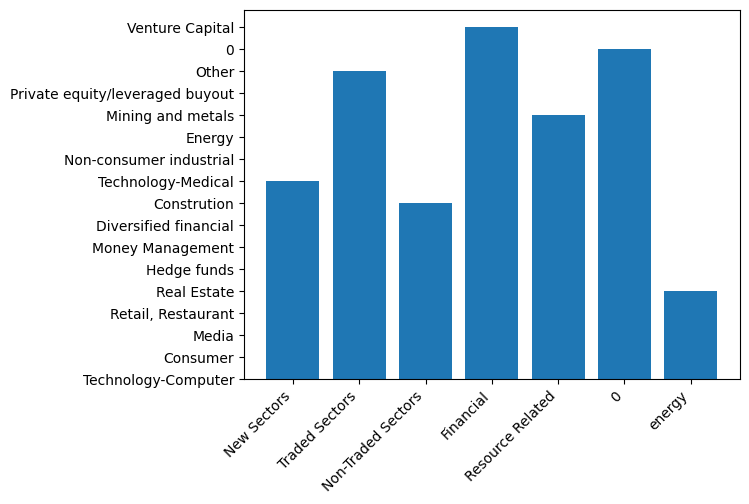

In [212]:
plt.bar(data["wealth.how.category"], data["wealth.how.industry"])
plt.xticks(rotation=45, ha='right');
plt.savefig("Forbes Billionaire Data Analysis/industry vs category.png")

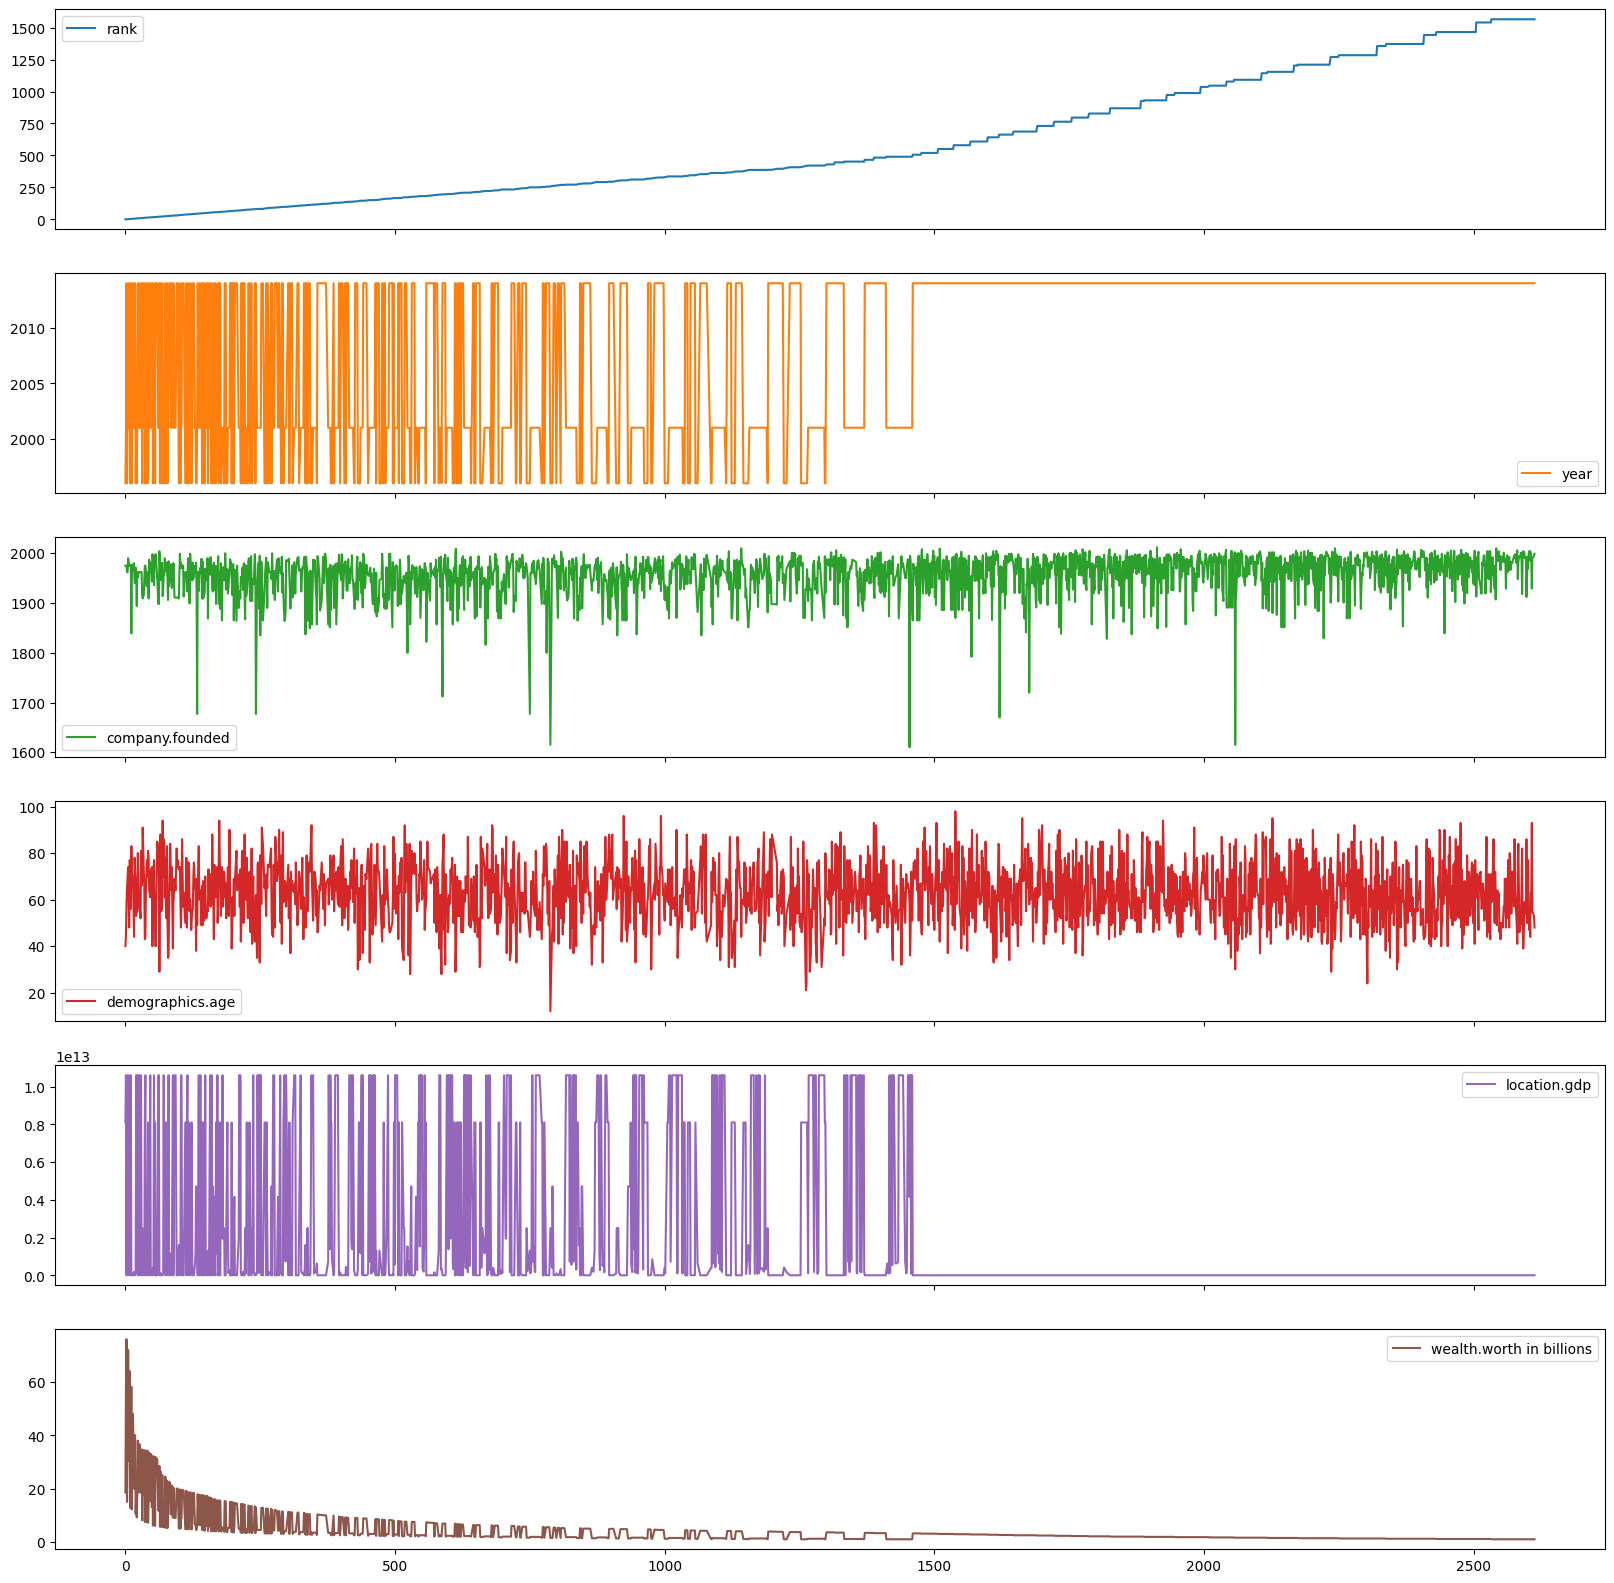

In [213]:
data.plot(subplots=True, figsize=(20, 20))
plt.savefig("Forbes Billionaire Data Analysis/data plot.png")

In [214]:
data["wealth.how.category"].head(10)

0            New Sectors
1            New Sectors
2            New Sectors
3         Traded Sectors
4         Traded Sectors
5     Non-Traded Sectors
7            New Sectors
8     Non-Traded Sectors
9              Financial
10           New Sectors
Name: wealth.how.category, dtype: object

In [215]:
data["wealth.how.category"].value_counts()

wealth.how.category
Financial             665
Non-Traded Sectors    489
Traded Sectors        465
New Sectors           287
Resource Related      226
0                      65
energy                  1
Name: count, dtype: int64

In [216]:
data[data["wealth.how.category"] == 0]

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,location.citizenship,location.country code,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited


In [217]:
set(data["wealth.how.category"]) - set(data["wealth.how.industry"])

{'Financial',
 'New Sectors',
 'Non-Traded Sectors',
 'Resource Related',
 'Traded Sectors',
 'energy'}

In [218]:
data.drop(data[data["wealth.how.category"] == 0].index, inplace=True)

In [219]:
len(data)

2198

In [220]:
data[data["wealth.how.industry"] == 0]

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,location.citizenship,location.country code,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited


In [221]:
data.drop(data[data["wealth.how.industry"] == 0].index, inplace=True)

In [222]:
data.head(10)

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,location.citizenship,location.country code,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,United States,USA,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,United States,USA,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,United States,USA,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,United States,USA,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,United States,USA,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited
5,Carlos Slim Helu,2,2014,1990,Telmex,founder,Communications,privatization,74,male,Mexico,MEX,0.000000e+00,Latin America,privatized and resources,72.0,Non-Traded Sectors,True,Media,not inherited
7,Paul Allen,3,2001,1975,Microsoft,founder,technology,new,48,male,United States,USA,1.060000e+13,North America,founder non-finance,30.4,New Sectors,True,Technology-Computer,not inherited
8,Amancio Ortega,3,2014,1975,Zara,founder,Fashion,new,77,male,Spain,ESP,0.000000e+00,Europe,founder non-finance,64.0,Non-Traded Sectors,True,"Retail, Restaurant",not inherited
9,Lee Shau Kee,4,1996,1976,Henderson Land Development,founder/chairman,real estate,new,68,male,Hong Kong,HKG,1.600000e+11,East Asia,self-made finance,12.7,Financial,True,Real Estate,not inherited
10,Larry Ellison,4,2001,1977,Oracle,founder,software,new,56,male,United States,USA,1.060000e+13,North America,founder non-finance,26.0,New Sectors,True,Technology-Computer,not inherited


In [223]:
len(data)

2198

In [224]:
data["wealth.how.category"].value_counts()

wealth.how.category
Financial             665
Non-Traded Sectors    489
Traded Sectors        465
New Sectors           287
Resource Related      226
0                      65
energy                  1
Name: count, dtype: int64

In [225]:
data["company.name"].value_counts()

company.name
Walmart                       17
Hyatt                         14
Campbell Soup                 14
SAP AG                        12
Sid Richardson Gasoline Co    11
                              ..
African Rainbow Minerals       1
Zhejiang Semir Garment         1
Ubiquiti Networks              1
Summit                         1
Furen Pharmaceutical Group     1
Name: count, Length: 1370, dtype: int64

In [226]:
data["demographics.gender"].value_counts()

demographics.gender
male      1987
female     211
Name: count, dtype: int64

In [227]:
data.drop("location.country code", axis=1, inplace=True)

In [228]:
data["wealth.worth in billions"].value_counts()

wealth.worth in billions
1.1     134
1.0     124
1.2     121
1.3     121
1.4     106
       ... 
10.8      1
14.9      1
15.1      1
24.5      1
17.3      1
Name: count, Length: 181, dtype: int64

In [229]:
data["wealth.worth in billions"] = data["wealth.worth in billions"] * 1000000000

In [230]:
data["wealth.worth in billions"]

0       1.850000e+10
1       5.870000e+10
2       7.600000e+10
3       1.500000e+10
4       3.230000e+10
            ...     
2607    1.000000e+09
2608    1.000000e+09
2609    1.000000e+09
2612    1.000000e+09
2613    1.000000e+09
Name: wealth.worth in billions, Length: 2198, dtype: float64

In [231]:
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

name
company.name
company.relationship
company.sector
company.type
demographics.gender
location.citizenship
location.region
wealth.type
wealth.how.category
wealth.how.industry
wealth.how.inherited


In [232]:
#for label, content in data.items():
 #   if pd.api.types.is_string_dtype(content):
  #      print(label)
   #     le = LabelEncoder()
    #    data[label] = le.fit_transform(data[label])

In [233]:
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

name
company.name
company.relationship
company.sector
company.type
demographics.gender
location.citizenship
location.region
wealth.type
wealth.how.category
wealth.how.industry
wealth.how.inherited


In [234]:
data.head()

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,location.citizenship,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,United States,8.100000e+12,North America,founder non-finance,1.850000e+10,New Sectors,True,Technology-Computer,not inherited
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,United States,1.060000e+13,North America,founder non-finance,5.870000e+10,New Sectors,True,Technology-Computer,not inherited
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,United States,0.000000e+00,North America,founder non-finance,7.600000e+10,New Sectors,True,Technology-Computer,not inherited
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,United States,8.100000e+12,North America,founder non-finance,1.500000e+10,Traded Sectors,True,Consumer,not inherited
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,United States,1.060000e+13,North America,founder non-finance,3.230000e+10,Traded Sectors,True,Consumer,not inherited


## Plotting

/tmp/ipykernel_5147/1888169257.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data["name"], rotation=45)


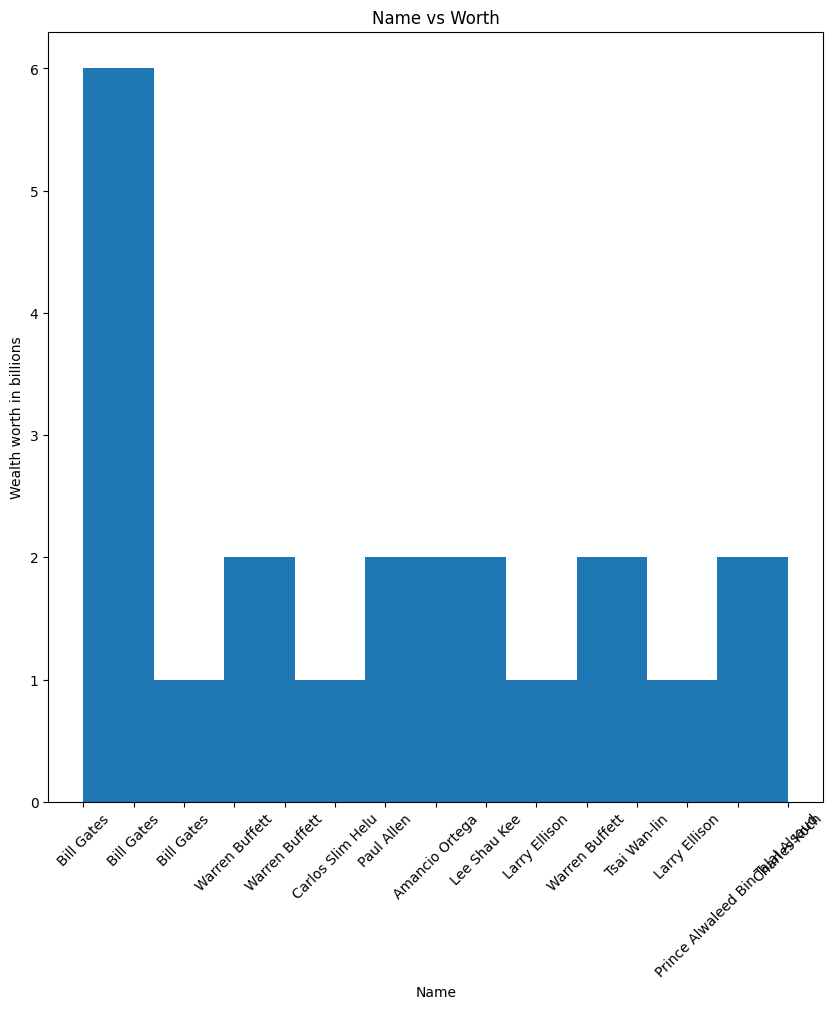

In [235]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(title="Name vs Worth",
       xlabel="Name",
       ylabel="Wealth worth in billions")
ax.hist(data["name"].head(20))
ax.set_xticklabels(data["name"], rotation=45)
fig.savefig("Forbes Billionaire Data Analysis/Images/name.png")

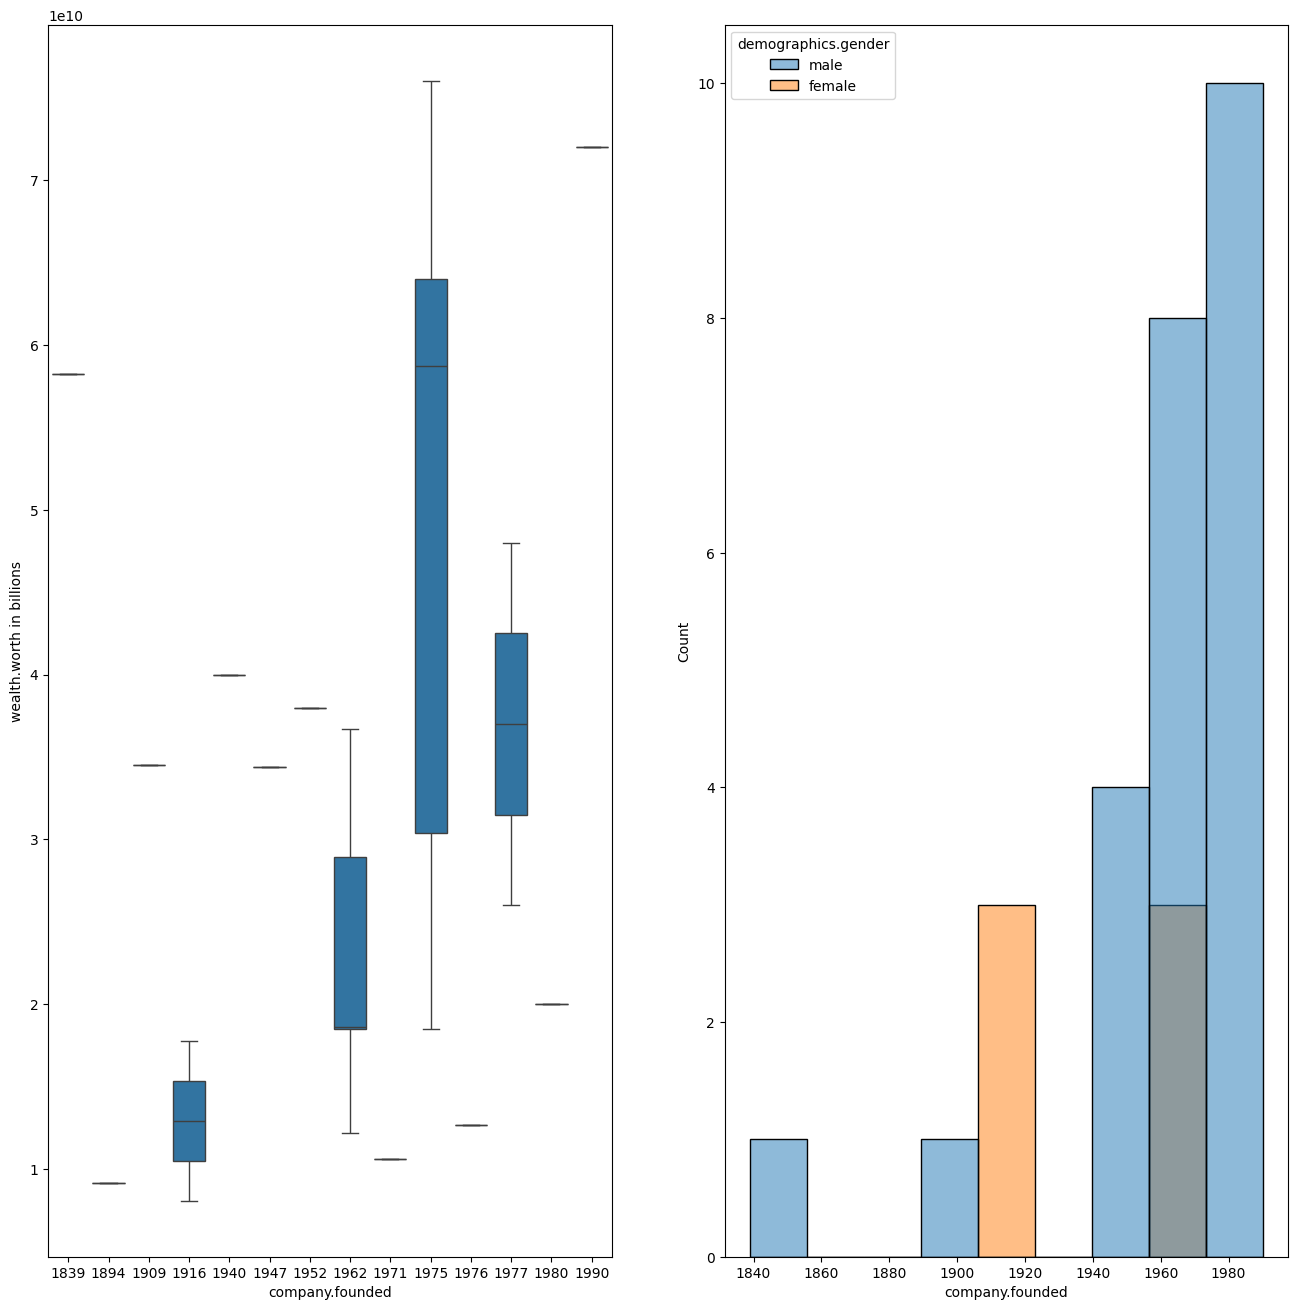

In [236]:
fig, ax = plt.subplots(1, 2, figsize=(16, 16))
sns.boxplot(ax=ax[0], data=data, x=data["company.founded"].head(30), y=data["wealth.worth in billions"].head(30))
sns.histplot(x=data["company.founded"].head(30), hue=data["demographics.gender"])
fig.savefig("Forbes Billionaire Data Analysis/Images/box.png")

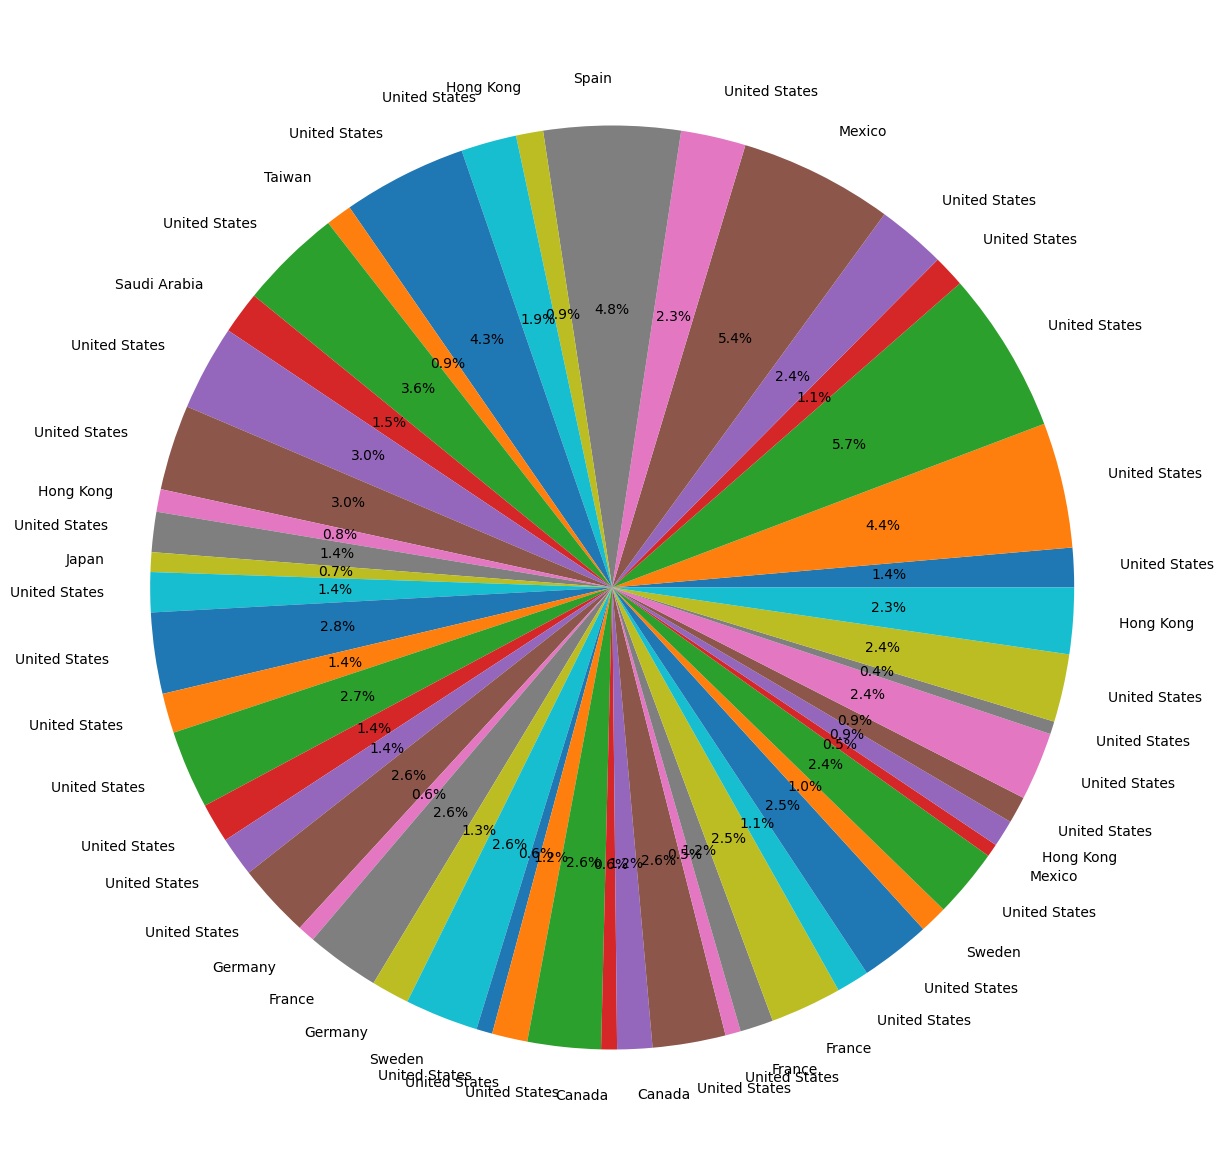

In [241]:
values = data["wealth.worth in billions"].head(50)
labels = data["location.citizenship"].head(50)
percentages = [(value / sum(values)) * 100 for value in values]

fig, ax = plt.subplots(figsize=(15, 15));
ax.pie(values, labels=labels, autopct=lambda p : '{:.1f}%'.format(p));
fig.savefig("Forbes Billionaire Data Analysis/Images/pie.png")

In [239]:
data["wealth.worth in billions"]

0       1.850000e+10
1       5.870000e+10
2       7.600000e+10
3       1.500000e+10
4       3.230000e+10
            ...     
2607    1.000000e+09
2608    1.000000e+09
2609    1.000000e+09
2612    1.000000e+09
2613    1.000000e+09
Name: wealth.worth in billions, Length: 2198, dtype: float64

In [240]:
data

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,location.citizenship,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,United States,8.100000e+12,North America,founder non-finance,1.850000e+10,New Sectors,True,Technology-Computer,not inherited
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,United States,1.060000e+13,North America,founder non-finance,5.870000e+10,New Sectors,True,Technology-Computer,not inherited
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,United States,0.000000e+00,North America,founder non-finance,7.600000e+10,New Sectors,True,Technology-Computer,not inherited
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,United States,8.100000e+12,North America,founder non-finance,1.500000e+10,Traded Sectors,True,Consumer,not inherited
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,United States,1.060000e+13,North America,founder non-finance,3.230000e+10,Traded Sectors,True,Consumer,not inherited
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,Wang Yong,1565,2014,1986,Xiwang Group,founder,food sweeteners,new,63,male,China,0.000000e+00,East Asia,founder non-finance,1.000000e+09,Traded Sectors,True,Consumer,not inherited
2608,"William Moncrief, Jr.",1565,2014,1929,Moncrief Oil,relation,oil,new,93,male,United States,0.000000e+00,North America,inherited,1.000000e+09,Resource Related,True,Energy,father
2609,Wu Chung-Yi,1565,2014,1991,Tingyi,investor,beverages and food,new,55,male,Taiwan,0.000000e+00,East Asia,executive,1.000000e+09,Traded Sectors,True,Non-consumer industrial,not inherited
2612,Zdenek Bakala,1565,2014,1994,Patria Finance,founder,coal,new,53,male,Czech Republic,0.000000e+00,Europe,privatized and resources,1.000000e+09,Resource Related,True,Mining and metals,not inherited


## Data Creation

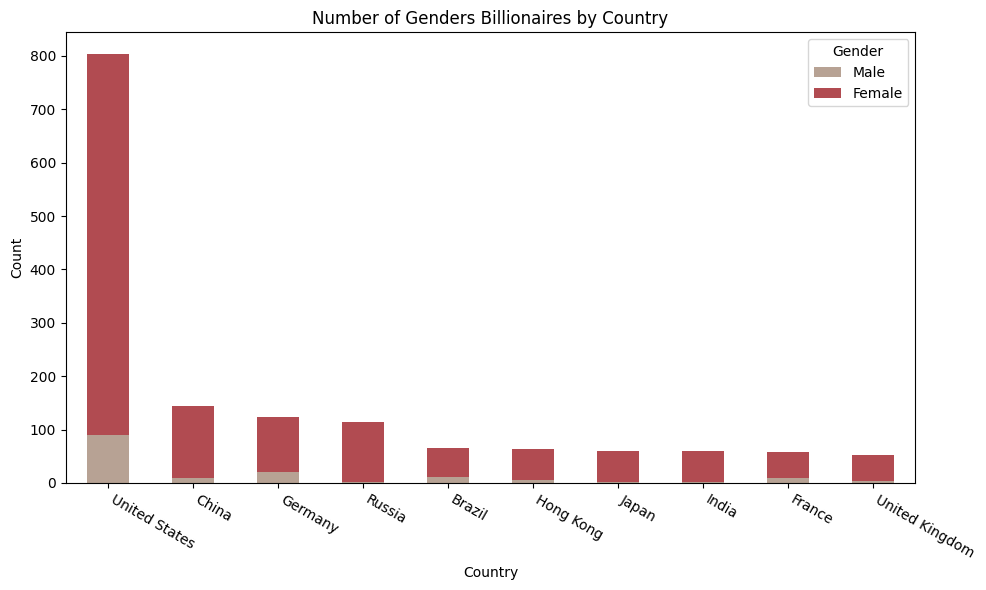

In [247]:
import matplotlib.pyplot as plt

# Group by country and rank, count occurrences, and reshape the data
counts = data.groupby(['location.citizenship', 'demographics.gender']).size().unstack().dropna()
counts["sum"] = counts.sum(axis=1)  # sum across all columns
counts = counts.sort_values(by=['sum'], ascending=False).drop(columns=['sum'])[:10]

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
counts.plot(kind='bar', stacked=True, color=['#B7A294', '#B14B51'], ax=ax)

# Set plot attributes
plt.title('Number of Genders Billionaires by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.xticks(rotation=-30, ha='left')  

plt.savefig("Forbes Billionaire Data Analysis/Images/rank.png")
# Show the plot
plt.tight_layout()
plt.show()

In [243]:
data.columns

Index(['name', 'rank', 'year', 'company.founded', 'company.name',
       'company.relationship', 'company.sector', 'company.type',
       'demographics.age', 'demographics.gender', 'location.citizenship',
       'location.gdp', 'location.region', 'wealth.type',
       'wealth.worth in billions', 'wealth.how.category',
       'wealth.how.from emerging', 'wealth.how.industry',
       'wealth.how.inherited'],
      dtype='object')

In [248]:
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        print(label)
        le = LabelEncoder()
        data[label] = le.fit_transform(data[label])

name
company.name
company.relationship
company.sector
company.type
demographics.gender
location.citizenship
location.region
wealth.type
wealth.how.category
wealth.how.industry
wealth.how.inherited


In [249]:
data.head()

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,location.citizenship,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited
0,195,1,1996,1975,848,31,4,3,40,1,66,8.100000e+12,5,1,1.850000e+10,2,True,14,2
1,195,1,2001,1975,848,31,4,3,45,1,66,1.060000e+13,5,1,5.870000e+10,2,True,14,2
2,195,1,2014,1975,848,31,4,3,58,1,66,0.000000e+00,5,1,7.600000e+10,2,True,14,2
3,1647,2,1996,1962,160,31,2,3,65,1,66,8.100000e+12,5,1,1.500000e+10,5,True,2,2
4,1647,2,2001,1962,160,31,2,3,70,1,66,1.060000e+13,5,1,3.230000e+10,5,True,2,2


In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2198 entries, 0 to 2613
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      2198 non-null   int64  
 1   rank                      2198 non-null   int64  
 2   year                      2198 non-null   int64  
 3   company.founded           2198 non-null   int64  
 4   company.name              2198 non-null   int64  
 5   company.relationship      2198 non-null   int64  
 6   company.sector            2198 non-null   int64  
 7   company.type              2198 non-null   int64  
 8   demographics.age          2198 non-null   int64  
 9   demographics.gender       2198 non-null   int64  
 10  location.citizenship      2198 non-null   int64  
 11  location.gdp              2198 non-null   float64
 12  location.region           2198 non-null   int64  
 13  wealth.type               2198 non-null   int64  
 14  wealth.worth 

In [251]:
X = data.drop("wealth.worth in billions", axis=1)
y = data["wealth.worth in billions"]

In [252]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X_df = pd.DataFrame(scaled_X, columns=X.columns)

In [253]:
scaled_X_df.head()

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,location.citizenship,location.gdp,location.region,wealth.type,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited
0,-1.352822,-1.344893,-2.030269,0.423530,0.404294,-0.703969,-1.886982,0.214627,-1.715206,0.325868,0.989096,1.856314,0.973291,-0.873573,-0.447090,0.0,1.345459,0.68326
1,-1.352822,-1.344893,-1.293756,0.423530,0.404294,-0.703969,-1.886982,0.214627,-1.335033,0.325868,0.989096,2.571166,0.973291,-0.873573,-0.447090,0.0,1.345459,0.68326
2,-1.352822,-1.344893,0.621177,0.423530,0.404294,-0.703969,-1.886982,0.214627,-0.346583,0.325868,0.989096,-0.459807,0.973291,-0.873573,-0.447090,0.0,1.345459,0.68326
3,1.563943,-1.342792,-2.030269,0.105702,-1.322226,-0.703969,-1.902586,0.214627,0.185659,0.325868,0.989096,1.856314,0.973291,-0.873573,1.461072,0.0,-1.244893,0.68326
4,1.563943,-1.342792,-1.293756,0.105702,-1.322226,-0.703969,-1.902586,0.214627,0.565832,0.325868,0.989096,2.571166,0.973291,-0.873573,1.461072,0.0,-1.244893,0.68326


In [255]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X_df, y, test_size=0.2)

In [257]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
models = {"Random Forest": RandomForestRegressor(),
          "Decision Tree": DecisionTreeRegressor(),
          "Gradient Boost": GradientBoostingRegressor(),
          "SVR": SVR(),
          "Lasso": Lasso()
         }

In [261]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def score(y_true, y_preds):
    metrics = {"Mean Absolute Error": mean_absolute_error(y_true, y_pred),
               "Mean Squared Error": mean_squared_error(y_true, y_pred),
               "R2 Score": r2_score(y_true, y_pred)
              }
    return metrics

In [262]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}:- {score(y_test, y_pred)}")
    

Random Forest:- {'Mean Absolute Error': 25600000.0, 'Mean Squared Error': 1.2222468181818182e+16, 'R2 Score': 0.9989454675105197}
Decision Tree:- {'Mean Absolute Error': 34090909.09090909, 'Mean Squared Error': 3.65e+16, 'R2 Score': 0.9968508458935251}
Gradient Boost:- {'Mean Absolute Error': 114144098.94797474, 'Mean Squared Error': 6.6754198092825544e+16, 'R2 Score': 0.9942405683000423}
SVR:- {'Mean Absolute Error': 1822727256.4678323, 'Mean Squared Error': 1.295081808142056e+19, 'R2 Score': -0.11737320392641926}
Lasso:- {'Mean Absolute Error': 2029239769.2106156, 'Mean Squared Error': 7.589256712361901e+18, 'R2 Score': 0.3452126317581833}


In [263]:
len(data)

2198